## **Complete Text Processing**

**General Feature Extraction**
- File loading
- Word counts
- Character counts
- Average character count
- Stop word count
- Count #Hashtag and @mention
- If numeric digits are present 
- Uppercase word counts

**Pre-processing and Cleaning**
- Lower Case
- Contraction to expansion
- Email removal and counts
- URLs removal and counts
- Removal of RT
- Removal of special characters
- Removal of multiple characters
- removal of HTML Tags
- Removal of accented characters
- Removal of stop words
- Conversion into base form of words
- Common occuring words removal
- Word Cloud
- Spelling correction
- Tokenization
- Lemmatization
- Detecting Entity using NER
- Noun detection
- Language detection
- Sentence detection
- Using in-built sentiment classifier

## **General Feature Extraction**


In [ ]:
import pandas as pd 
import numpy as np
import spacy

from spacy.lang.en.stop_words import STOP_WORDS as stopwords

**File loading**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv')
df

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


In [ ]:
df['sentiment'].value_counts()

0    2000
1    2000
Name: sentiment, dtype: int64

**Word Counts**

In [ ]:
##len('this is text'.split())

In [ ]:
df['word_counts'] = df['twitts'].apply(lambda x : len(str(x).split()))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts
3531,@daveyaden LOL STOP JUDGING ME PUBLICLY!! LOL ...,1,22
3941,#assassinate is also trending because #spymast...,1,10
2183,making our cheer music!,1,4
2338,"Not that I am but &quot;I love love, I love be...",1,27
2979,Leslie Lello's twitter feed is now available a...,1,14


In [ ]:
df['word_counts'].max()

32

In [ ]:
df['word_counts'].min()

1

In [ ]:
df[df['word_counts']==1]

,twitts,sentiment,word_counts
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


**Character Count**

In [ ]:
len('this is')

7

In [ ]:
def char_counts(x):
  s = x.split()
  x = ''.join(s)
  return len(x)

In [ ]:
char_counts('this is')

6

In [ ]:
df['char_counts'] = df['twitts'].apply(lambda x: char_counts(str(x)))

In [ ]:
df.sample(5)

**Average Word Length**

In [ ]:
#x = 'this is' ## 6/2 = 3
#y = 'thankyou guys' ## 12/2 = 6

In [ ]:
df['avg_word_len'] = df['char_counts']/df['word_counts']

In [ ]:
df.sample(4)

,twitts,sentiment,word_counts,char_counts,avg_word_len
424,@NaturallyNike a good experience.. the only th...,0,15,68,4.533333
3592,@reemakoul @purugovind public forum hai.. naam...,1,9,57,6.333333
186,catching up on some tv. i miss dvr,0,8,27,3.375000
2633,Pink flowery background Oh Yeah!,1,5,28,5.600000


**Stop Words Count**

In [ ]:
print(stopwords)

{'back', "n't", 'you', 'over', 'seemed', 'eleven', 'see', 'third', 'alone', 'three', 'none', 'therefore', 'always', 'herein', 'say', 'becomes', 'whom', 'nine', 'seeming', 'using', 'name', 'amongst', 'move', 'among', 'there', 'could', '‘re', 'although', 'has', 'others', 'perhaps', 'us', 'of', 'had', 'per', 'whereby', 'each', 'hereafter', 'various', 'side', 'enough', 'been', 'whole', 'did', 'made', 'first', 'nobody', 'fifteen', 'can', 'seems', 'that', 'few', 'your', 'he', 'someone', 'this', 'themselves', 'will', 'after', 'where', 'whither', "'ve", 'whence', 'than', 'six', 'a', 'thereafter', '’d', '‘ll', 'really', 'top', 'very', "'ll", 'somehow', 'towards', '‘ve', 'upon', 'four', 'noone', 'against', 'was', 'front', 'nor', 'whether', 'is', 'former', 'least', 'nothing', 'them', 'not', 'everyone', 'sixty', 'were', 'since', 'under', 'behind', 'last', 'once', 'beside', 'hence', 'who', 'most', 'via', 'by', 'along', 'show', 'never', 'hereupon', 'yourselves', 'also', 'go', 'as', 'well', 'already'

In [ ]:
len(stopwords)

326

In [ ]:
#x = 'this is the text data'

In [ ]:
#x.split()

In [ ]:
#[t for t in x.split() if t in stopwords]

In [ ]:
#len([t for t in x.split() if t in stopwords])

In [ ]:
df['stop_word_len'] = df['twitts'].apply(lambda x: ([t for t in x.split() if t in stopwords]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_word_len
345,@FakerPattyPattz Oh dear. Were you drinking ou...,0,12,67,5.583333,"[you, out, of, the]"
2676,@Pradeepz you are most welcome even though it ...,1,10,49,4.900000,"[you, are, most, even, though, it]"
2523,Ah but yet God is with me all the way. He is a...,1,15,43,2.866667,"[but, yet, is, with, me, all, the, is, a]"
260,is it sad that i am totally bummed out that &q...,0,23,90,3.913043,"[is, it, that, i, am, out, that, is, to, the, ..."
168,still waiting for the UPS guy damn it i want ...,0,12,40,3.333333,"[still, for, the, it, i, my]"


**Count # and @**

In [ ]:
#x = 'this is #hashtag and this @mention'

In [ ]:
#x.split()

In [ ]:
#[t for t in x.split() if t.startswith('@')]

In [ ]:
#len([t for t in x.split() if t.startswith('@')])

In [ ]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [ ]:
df['mention_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [ ]:
df.sample(10)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,hashtags_count,mention_count
2652,enjoying the beautiful weather,1,4,27,6.750000,[the],0,0
3350,"doesn't matter, got new password now",1,6,31,5.166667,[now],0,0
1685,"i wish it would stop raining, i only have a li...",0,15,57,3.800000,"[i, it, would, i, only, have, a, of]",0,0
2782,i wanna go parasailing and jet skiing in borac...,1,12,56,4.666667,"[i, go, and, in, next]",0,0
1257,@theblish Socials,0,2,16,8.000000,[],0,1
3349,@inklesstales I have a feeling you should stan...,1,20,108,5.400000,"[have, a, you, should, at, the, for, the, to]",0,1
1718,@ninjamal oops sorry. And haha yes exactly li...,0,9,44,4.888889,[that],0,1
3795,I love Britney Spears. she is the best &lt;3,1,9,36,4.000000,"[she, is, the]",0,0
1014,Had my twitter account 'suspended' - i think f...,0,26,108,4.153846,"[my, i, for, on, the, and, to, a, about, it, m...",0,0
983,Soo Alice In Wonderland needs released like......,0,14,76,5.428571,"[this, not]",0,0


**If numeric digits are present in twitts**

In [ ]:
#x = 'this is 1 and 2'

In [ ]:
#x.split()

In [ ]:
#x.split()[2].isdigit()

In [ ]:
#[t for t in x.split() if t .isdigit()]

In [ ]:
#len([t for t in x.split() if t .isdigit()])

In [ ]:
df['numeric_counts'] = df['twitts'].apply(lambda x : len([t for t in x.split() if t .isdigit()]))

In [ ]:
df.sample(4)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,hashtags_count,mention_count,numeric_counts
1787,"@jprobyn, PLEASE FIX IT! I don't want to sink",0,9,37,4.111111,[to],0,1,0
1291,I dropped one of my iPod earphones in a glass ...,0,12,43,3.583333,"[one, of, my, in, a, of]",0,0,0
525,Feel sooo sick again,0,4,17,4.250000,[again],0,0,0
1069,'that'll do' frames x 10 bought (Â£30!! - had ...,0,25,113,4.520000,"[had, of, to, do, of, be, a]",0,0,1


**UPPERCASE word count**

In [ ]:
#x = 'I AM HAPPY'
#y = 'i am happy'

In [ ]:
#[t for t in x.split() if t.isupper()]

In [ ]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [ ]:
df.sample(6)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,hashtags_count,mention_count,numeric_counts,upper_counts
3037,@yuhngfresh I waz gonna say THANK YOU lol but ...,1,18,72,4.000000,"[say, but, with, the]",0,2,1,8
3890,"@jonantim neither one, today because I slept in",1,8,40,5.000000,"[neither, because, in]",0,1,0,1
708,Today was really sad but also nice in a way. N...,0,17,75,4.411765,"[was, really, but, also, in, a, back, to]",0,0,0,0
2421,Hey new followers! Welcome to the madness,1,7,35,5.000000,"[to, the]",0,0,0,0
1519,So tired of studying and sick. i don't know i...,0,19,72,3.789474,"[of, and, i, if, be, to, for, much]",0,0,0,0
1673,Just got out the GMAT. D@MN!!!!!,0,6,27,4.500000,"[out, the]",0,0,0,2


## Preprocessing and Cleaning

**Lower Case**

In [ ]:
x = 'this is a Text'

In [ ]:
x.lower()

'this is a text'

In [ ]:
x = 45.0
str(x).lower()

'45.0'

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,hashtags_count,mention_count,numeric_counts,upper_counts
3285,"what a day! pikes mkt, bainbridge island, undg...",1,20,116,5.800000,"[a, at, now]",0,0,0,0
3051,@janetconner i didn't catch yours? you might b...,1,22,95,4.318182,"[might, be, to, why, we, an]",0,1,1,2
1800,james broach in the studio for his last ever s...,0,13,56,4.307692,"[in, the, for, his, last, show, on]",0,0,0,1
887,i keep reading contracts as cataracts... someo...,0,11,61,5.545455,"[i, keep, as, should, me]",0,0,0,0
326,argh i wish my hair was longish again i really...,0,15,56,3.733333,"[my, was, again, really, a]",0,0,0,2


**Contraction to Expansion**

In [ ]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}

In [ ]:
x = "i'm don't he'll"

In [ ]:
def cont_to_exp(x):
  if type(x) is str:
    for key in contractions:
      value = contractions[key]
      x=x.replace(key,value)
    return x
  else:
    return x


In [ ]:
cont_to_exp(x)

'i am do not he will'

In [ ]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

10 loops, best of 5: 76.3 ms per loop


In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,hashtags_count,mention_count,numeric_counts,upper_counts
733,@drcharlii wtf thats unfair if i roll any numb...,0,15,54,3.600000,"[if, i, any, a]",0,1,0,0
3624,just posted a new blog post. be forewarned it ...,1,14,55,3.928571,"[a, and]",0,0,0,1
2715,"still got a headache,cant have ibroprofen or c...",1,23,101,4.391304,"[still, a, have, or, as, i, get, back, to, on,...",0,0,0,0
145,@brianwelburn it cannot upgrade to ie8 because...,0,21,97,4.619048,"[to, because, much, of, our, with, out, of]",0,1,0,2
2095,@acherryscott thanks a lot,1,4,23,5.750000,[a],0,1,0,0


**Count and remove emails**

In [ ]:
import re

In [ ]:
df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,hashtags_count,mention_count,numeric_counts,upper_counts
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,[],0,1,0,0


In [ ]:
df.iloc[3713]['twitts']

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [ ]:
x = '@securerecs arghh me please  markbradbury_16@hotmail.com'

In [ ]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x)

['markbradbury_16@hotmail.com']

In [ ]:
df['emails'] = df['twitts'].apply(lambda x : re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x))

In [ ]:
df['email_counts'] = df['emails'].apply(lambda x : len(x))

In [ ]:
df[df['email_counts']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,hashtags_count,mention_count,numeric_counts,upper_counts,emails,email_counts
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,[],0,1,0,0,[markbradbury_16@hotmail.com],1


In [ ]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"",x)

'@securerecs arghh me please  '

In [ ]:
df['twitts'] = df['twitts'].apply( lambda x : re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"",x))

In [ ]:
df[df['email_counts']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,hashtags_count,mention_count,numeric_counts,upper_counts,emails,email_counts
3713,@securerecs arghh me please,1,5,51,10.2,[],0,1,0,0,[markbradbury_16@hotmail.com],1


**URLs removal and counts**

In [ ]:
df['url_flags'] = df['twitts'].apply(lambda x : len(re.findall(r'(hhtp|https|ftp|ssh)://([\w_-]+(?:(?:\.[w_]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])',x)))

In [ ]:
re.sub(r'(hhtp|https|ftp|ssh)://([\w_-]+(?:(?:\.[w_]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])','',x)

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/+#-]*[\w@?^=%&/+#-])?','', x))

In [ ]:
df.sample(4)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,hashtags_count,mention_count,numeric_counts,upper_counts,emails,email_counts,url_flags
2897,lol my dads here,1,4,13,3.250000,"[my, here]",0,0,0,0,[],0,0
3914,"@rochelleyap hmmmmmmm, maybe! after the cip k?...",1,11,55,5.000000,"[the, for, you]",0,1,0,1,[],0,0
3859,loves simon cowell! he is such a legend!,1,8,33,4.125000,"[he, is, such, a]",0,0,0,1,[],0,0
1256,@claireekersey me too,0,3,19,6.333333,"[me, too]",0,1,0,0,[],0,0


**Remove RT**

In [ ]:
df[df['twitts'].str.contains('rt')] ##RT means read text

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,hashtags_count,mention_count,numeric_counts,upper_counts,emails,email_counts,url_flags
4,@mandagoforth me bad! it is funny though. zach...,0,26,116,4.461538,"[me, is, only, there, for, a, few, to, just, p...",0,2,0,0,[],0,0
23,"ut oh, i wonder if the ram on the desktop is s...",0,14,46,3.285714,"[if, the, on, the, is, to, go]",0,0,0,2,[],0,0
59,@paulmccourt dunno what sky you're looking at!...,0,15,80,5.333333,"[what, of, in]",0,1,0,0,[],0,0
75,im back home in belfast im realli tired thoug...,0,22,84,3.818182,"[back, in, though, and, i, to, see, at, the]",0,0,0,1,[],0,0
81,@lilmonkee987 i know what you mean... i feel s...,0,11,48,4.363636,"[i, what, you, i, too]",0,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,for the press so after she recovered she kille...,1,24,100,4.166667,[now],0,0,0,0,[],0,0
3919,earned her cpr &amp; first aid certifications!,1,7,40,5.714286,[her],0,0,0,1,[],0,0
3945,"@teciav &quot;i look high, i look low, i look ...",1,23,106,4.608696,"[i, i, everywhere, i, for, a, in, the, of, the]",0,1,0,0,[],0,0
3951,i am soo very parched. and hungry. oh and i am...,1,21,87,4.142857,"[am, very, and, about, at, one, can]",0,0,2,1,[],0,0


In [ ]:
x = 'rt @username: hello hert'

In [ ]:
re.sub(r'\brt\b','',x).strip()

'@username: hello hert'

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x : re.sub(r'\brt\b','',x).strip())

In [ ]:
df.sample(4)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,hashtags_count,mention_count,numeric_counts,upper_counts,emails,email_counts,url_flags
130,tummy painnnn boo. this sucks.,0,5,26,5.200000,[this],0,0,0,0,[],0,0
3342,@koifishsushi yes it was,1,4,21,5.250000,"[it, was]",0,1,0,0,[],0,0
3738,@madmohican spendin it in bed wiv my lover hav...,1,24,104,4.333333,"[it, in, my, not, in]",0,1,0,0,[],0,0
3348,"@timtech awww, how cute. i love when men go al...",1,11,47,4.272727,"[how, i, when, go, all]",0,1,0,0,[],0,0


**Removal of special characters**

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'[^\w]+',"",x))

In [ ]:
df.sample(4)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,hashtags_count,mention_count,numeric_counts,upper_counts,emails,email_counts,url_flags
3302,thoughtshelostherrevisioncrystalbutfounditmiss...,1,12,54,4.500000,"[she, her, it]",0,0,0,0,[],0,0
1403,cuzzyjustcalledtheyaregoingtowatchamoviejingyi...,0,15,66,4.400000,"[just, to, a, at]",0,0,0,0,[],0,0
2100,gointoauntgerisgonnaplaylaxwbrielletomorrow,1,10,46,4.600000,[to],0,0,0,0,[],0,0
3988,tiamowrycwsuxfordroppingtheshowthanksgodfortho...,1,18,76,4.222222,"[for, the, for, those, will, for, you]",0,1,1,1,[],0,0


**Removal of multiple or white spaces**

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x:' '.join(x.split()))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,hashtags_count,mention_count,numeric_counts,upper_counts,emails,email_counts,url_flags
183,photomissgermany,0,4,44,11.000000,[],0,0,0,0,[],0,0
43,andrewhuntrejustlookeduptheindustrylooksfunnyc...,0,21,113,5.380952,"[up, it, to, which]",0,1,0,1,[],0,0
994,ihavehadtodepallmygigsoutthisweekendduetomynec...,0,25,111,4.440000,"[had, to, all, my, out, this, due, to, my, had...",0,0,0,0,[],0,0
1993,imayaswellnotevensleepjustgetreadyforwork,0,12,42,3.500000,"[may, as, well, not, even, just, get, for]",0,0,0,1,[],0,0
3784,pinkthanksforthatmentalimageyourealuckywoman,1,10,47,4.700000,"[for, that, a]",0,1,0,0,[],0,0


**Removal of HTML Tags**

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x,'lxml').get_text().strip())

CPU times: user 601 ms, sys: 40.7 ms, total: 642 ms
Wall time: 629 ms


**Removal of Accented Characters**

In [ ]:
x = 'Áccěntěd těxt'

In [ ]:
import unicodedata

In [ ]:
def remove_accented_chars(x):
  x = unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
  return x

In [ ]:
remove_accented_chars(x)

'Accented text'

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x))

In [ ]:
nlp = spacy.load('en_core_web_sm')

x = 'this is chocolates. what is times? this balls are rolling'

In [ ]:
def make_to_base(x):
  x = str(x)
  x_list = []
  doc = nlp(x)

  for token in doc:
    lemma = token.lemma_
    if lemma == '-PRON-' or lemma == 'be':
      lemma = token.text 
    
    x_list.append(lemma)
  return " ".join(x_list)

In [ ]:
make_to_base(x)

'this is chocolate . what is time ? this ball are roll'

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: make_to_base(x))

In [ ]:
# common words removal

x = 'this is this okay bye'

text = ' '.join(df['twitts'])

len(text)

302590

In [ ]:
text = text.split()
len(text)

53124

In [ ]:
freq_comm = pd.Series(text).value_counts()

In [ ]:
f20 = freq_comm[:20]

In [ ]:
f20

to      1336
I       1258
the     1215
a        935
my       721
i        667
and      656
is       559
you      545
in       538
for      507
of       475
it       437
on       387
me       323
have     312
that     311
so       298
at       295
was      263
dtype: int64

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x:  ' '.join([t for t in x.split() if t not in f20]))

In [ ]:
df.sample(5)

,twitts,sentiment
1244,"Um. Fuck. Colorado State, UCF UA all begin acc...",0
82,@peterfacinelli hey peter just wondering when ...,0
624,@AndyT13C may or may not been ignoring lately ...,0
1996,@ babiiluv23 miss 2 fend! told u 2 come,0
3353,"Spencer coming over dinna, soooo excited.",1


In [ ]:
# rare word removal

rare20 = freq_comm.tail(20)
rare20

Prototype,     1
inFamous,      1
Red            1
Faction:       1
Guerrilla,     1
L4D.           1
@laurapearl    1
lose,          1
appears.       1
Ly             1
gosh,          1
pudding        1
involved       1
hatred         1
aside,         1
ok!            1
@juderivera    1
yup..          1
frizzy         1
hope!          1
dtype: int64

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [ ]:
df.sample(5)

,twitts,sentiment
1140,"Virus going reverse now, god guts hurt",0
1105,@nick_carter Why won't accept friend request @...,0
3684,what happened mileys best friend leslie? or le...,1
2004,"@Akihikio Indeed, it's very convenient. Take p...",1
2161,Just got great feedback negotiation - nice dis...,1


In [ ]:
# word cloud visualization

!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
text = ' '.join(df['twitts'])

In [ ]:
len(text)

259949

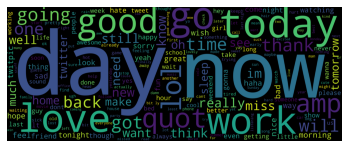

In [ ]:
wc = WordCloud(width=5000, height=2000).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
# spelling correction

!pip install -U textblob

     |████████████████████████████████| 636 kB 25.2 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

In [ ]:
x = "thainks forr watching it"

In [ ]:
x = TextBlob(x).correct()

In [ ]:
x

TextBlob("thanks for watching it")

In [ ]:
# Tokenization Using TextBlob

x = "thanks#watching this video. please like it"

In [ ]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [ ]:
doc = nlp(x)
for token in doc:
  print(token)

thanks#watching
this
video
.
please
like
it


In [ ]:
# Detecting Nouns

x = 'Breaking News: Donal Trump, the president of th USA is looking to sign a deal to mine the moon'

In [ ]:
doc = nlp(x)

In [ ]:
for noun in doc.noun_chunks:
  print(noun)

Breaking News
Donal Trump
the president
th USA
a deal
the moon


In [ ]:
# Use TextBlob's inbuilt Sentiment Classifier

from textblob.sentiments import NaiveBayesAnalyzer

x = 'we all stands together, we are gonna win this fight'

tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

tb.sentiment

Sentiment(classification='pos', p_pos=0.9180581552428241, p_neg=0.0819418447571765)